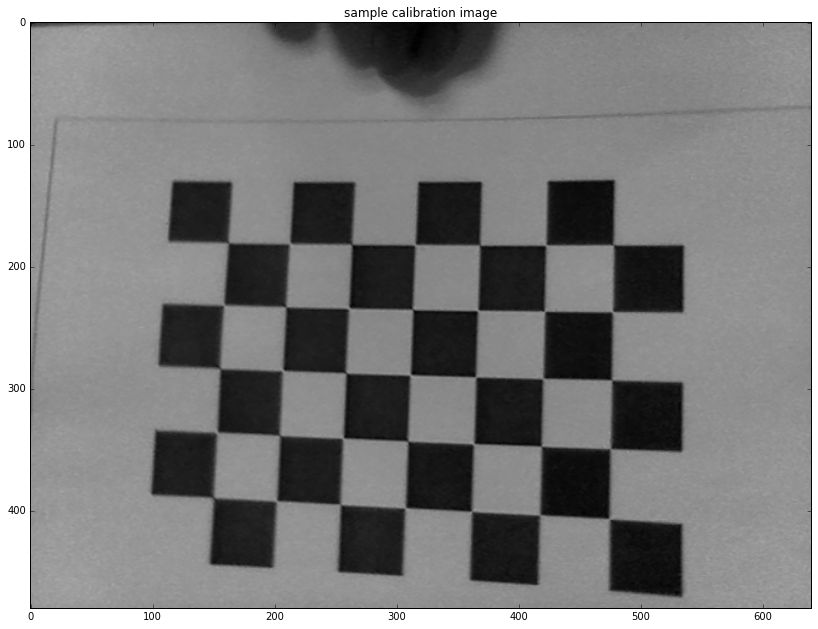

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# read all jpg images
images = glob.glob('images/*.png')

sample_image = cv2.imread('/home/shishu/work/vscode/Camera_calibration/images/calibration_1.jpg')

plt.figure(figsize=(14,14))
plt.imshow(sample_image)
plt.title('sample calibration image')
plt.show()
# termination criteria
# square size(mm)
square_size = 19
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, square_size, 0.001)
weight = 7
height = 5

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((weight*height,3), np.float32)
objp[:,:2] = np.mgrid[0:weight,0:height].T.reshape(-1,2)
print objp

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 [ 4.  0.  0.]
 [ 5.  0.  0.]
 [ 6.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  1.  0.]
 [ 2.  1.  0.]
 [ 3.  1.  0.]
 [ 4.  1.  0.]
 [ 5.  1.  0.]
 [ 6.  1.  0.]
 [ 0.  2.  0.]
 [ 1.  2.  0.]
 [ 2.  2.  0.]
 [ 3.  2.  0.]
 [ 4.  2.  0.]
 [ 5.  2.  0.]
 [ 6.  2.  0.]
 [ 0.  3.  0.]
 [ 1.  3.  0.]
 [ 2.  3.  0.]
 [ 3.  3.  0.]
 [ 4.  3.  0.]
 [ 5.  3.  0.]
 [ 6.  3.  0.]
 [ 0.  4.  0.]
 [ 1.  4.  0.]
 [ 2.  4.  0.]
 [ 3.  4.  0.]
 [ 4.  4.  0.]
 [ 5.  4.  0.]
 [ 6.  4.  0.]]


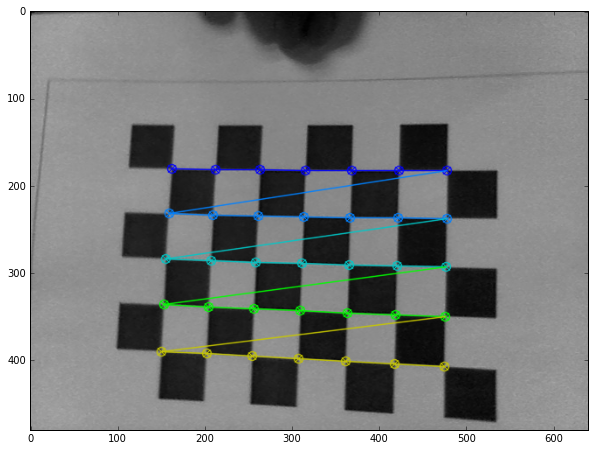

In [3]:
# convert bgr to gray and rgb
sample_gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
# find the chessboard corners in image ordinates
ret, corners =cv2.findChessboardCorners(sample_gray,(weight,height),None,1)

objpoints.append(objp*square_size)
# calculate the subpixels of corners
corners2 = cv2.cornerSubPix(sample_gray,corners,(11,11),(-1,-1),criteria)
imgpoints.append(corners2)
# draw the corners detected
draw_sample = cv2.drawChessboardCorners(rgb_image,(weight,height),corners2,ret)

plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()

[[ 773.55865493    0.          310.52047809]
 [   0.          771.35861503  179.55285718]
 [   0.            0.            1.        ]] [[  0.15386283  -2.15806652  -0.02306886  -0.01347358  10.44586589]] 640 480 [[ 782.96618652    0.          306.77927836]
 [   0.          768.36364746  175.72483262]
 [   0.            0.            1.        ]]


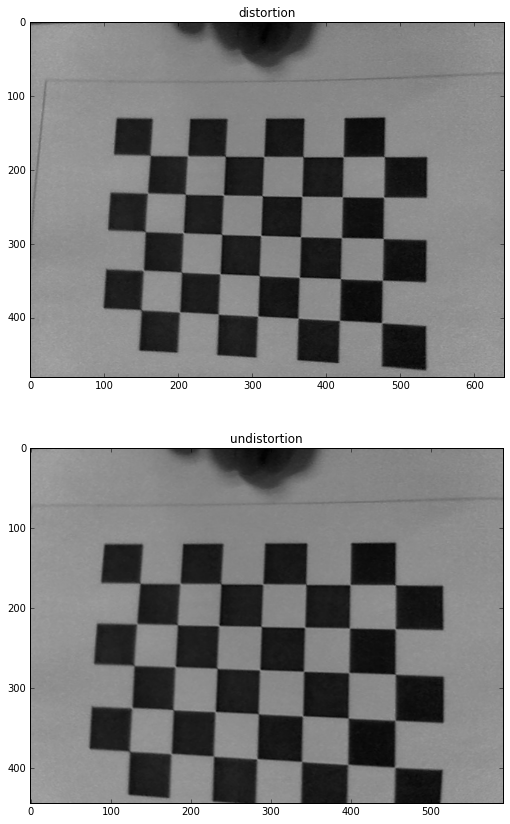

In [4]:
# it returns camera matrix, distortion coefficients,
# rotation and translation vectors
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, sample_gray.shape[::-1],None,None)

# get optimal camera matrix
h,  w = sample_image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print mtx,dist,w,h,newcameramtx
# undistort
dst = cv2.undistort(sample_image, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

plt.figure(figsize=(14,14))
plt.subplot(211)
plt.title('distortion')
plt.imshow(sample_image)
plt.subplot(212)
plt.title('undistortion')
plt.imshow(dst)

In [5]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
errors = [] # project errors

fx = [] # focal lengths in x-axis
fy = [] # focal lengths in y-axis
cx = [] # center x
cy = [] # center y 
k1 = [] # radial distortion coefficiencies
p1 = [] # tangential distortion coefficiencies

i=0
total_error=0
for fname in images:
    frame = cv2.imread(fname)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (weight,height),None,1)
#     print(corners.shape)
    if ret == True:
        objpoints2 = [] # 3d point in real world space
        imgpoints2 = [] 
        objpoints.append(objp)
        objpoints2.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        imgpoints2.append(corners2)
        
        # it returns camera matrix, distortion coefficients,
        # rotation and translation vectors
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
            objpoints2, imgpoints2, gray.shape[::-1],None,None)

        # get optimal camera matrix
        h,  w = frame.shape[:2]
        newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
        
        fx.append(newcameramtx[0,0])
        fy.append(newcameramtx[1,1])
        cx.append(newcameramtx[0,2])
        cy.append(newcameramtx[1,2])
        k1.append(dist[0,0])
        p1.append(dist[0,2])
        
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[0], tvecs[0], mtx, dist)
        error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
        errors.append(error)
        i+=1
total_error=sum(errors)
mean_error = total_error/len(objpoints)    
print mean_error
     

0.0918488737029


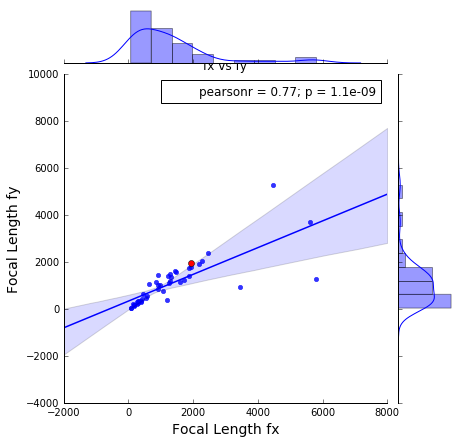

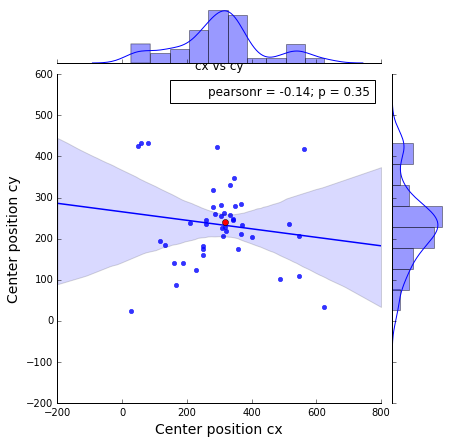

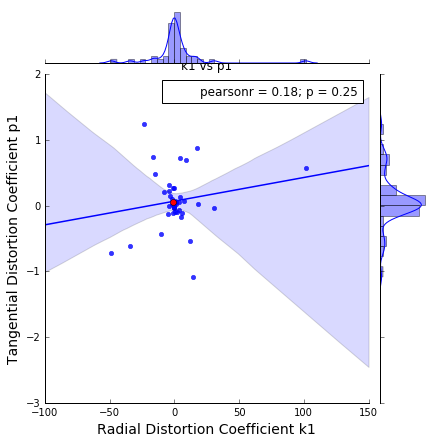

In [6]:
import seaborn as sns

# it returns camera matrix, distortion coefficients,
        # rotation and translation vectors
ret, opt_mtx, opt_dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1],None,None)
# get optimal camera matrix
h,  w = frame.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(opt_mtx,opt_dist,(w,h),1,(w,h))

ofx = newcameramtx[0,0]
ofy = newcameramtx[1,1]
ocx = newcameramtx[0,2]
ocy = newcameramtx[1,2]
ok1 = opt_dist[0,0]
op1 = opt_dist[0,2]

plt.figure(figsize=(12,12))
sns.jointplot(x=np.array(fx),y=np.array(fy),kind='reg')
plt.plot(ofx,ofy,'ro',linewidth = 3)
plt.xlabel('Focal Length fx',fontsize = 14)
plt.ylabel('Focal Length fy',fontsize = 14)
plt.title('fx vs fy')

plt.figure(figsize=(12,12))
sns.jointplot(x=np.array(cx),y=np.array(cy),kind='reg')
plt.plot(ocx,ocy,'ro',linewidth = 3)
plt.xlabel('Center position cx',fontsize = 14)
plt.ylabel('Center position cy',fontsize = 14)
plt.title('cx vs cy')

plt.figure(figsize=(12,12))
sns.jointplot(x=np.array(k1),y=np.array(p1),kind='reg')
plt.plot(ok1,op1,'ro',linewidth = 3)
plt.xlabel('Radial Distortion Coefficient k1',fontsize = 14)
plt.ylabel('Tangential Distortion Coefficient p1',fontsize = 14)
plt.title('k1 vs p1')

In [19]:
np.savez("point2.npz",mtx = opt_mtx, dist = opt_dist)
print('saved as point2.npz \r\n %d images mean error:%.3f' %(i,mean_error))
        

saved as point2.npz 
 44 images mean error:0.092
